# This notebook contains the analysis of the network dynamics on the SAM template and Majority Rule version 0
### Typical example of naming the dataframes: df_MR0_50_4wC. This dataframe is the ensemble of trajectories with: 
- Majority Rule 0, hence "MR0"
- n_critical=50% 
- temperature schedule is 4wC, meaning 4 week continuous cold. (alternating cold/warm is represented as 4wCW)
- typical ensemble size is 10 by default (can be changed in the argument of the generating function) 

In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import networkx as nx
import pandas as pd
import seaborn as sns

# Files and parameters

In [2]:
T_2d = hfsp.create_tissue("../inputs/2d_sam.csv", True)
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)

temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])

# These parameter values are for FT1
p_decay0 = 0
p_decay1 = 0.00003
p_decay2 = 0.00004
p_cold_2d = 0.0003
p_warm_2d = 0.03
p_cold_3d = 0.0004
p_warm_3d = 0.015
p_edge = 1

# Define g: chosen SAM template

In [3]:
g = T_3d

## Set-1 Data frames for MR0 and n_critical = 50%

In [ ]:
%%time

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, rule_code_node = [0,0.5], rule_code_edge = None, 
                              ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_noMR_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                        rule_code_node = [0,1], rule_code_edge = None, ensemble_size = 10, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_NoDecay_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay0, p_cold_3d, p_warm_3d, p_edge, 
                                  rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))



## Data Frames for MR0, 4wC, varying n_critical

In [ ]:
%%time

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_30_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.3], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_40_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.4], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_45_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.45], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_55_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.55], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_60_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.6], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_70_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.7], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


## Data Frames for MR0, 4wCW, varying n_critical

In [ ]:
%%time

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_30_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.3], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_40_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.4], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_45_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.45], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_55_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.55], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_60_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.6], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR0_70_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.7], rule_code_edge = None, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


## Typical code example for generating plots.

In [ ]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0, n_critical = 50%, 4-week cold", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], 'g', label='p_decay = 0.00003')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color='g', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
# fig.savefig("hfsp_with_vs_without_decay_2D.png", dpi = 600)

# Space for experiments

In [ ]:
# Simulations with varying n_critical, 4-week cold, Majority Rule 0

cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0,1,7)) #get 10 colors along the full range of hsv colormap

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations with varying n_critical, 4-week cold, Majority Rule 0", font = "Arial", fontsize = 13)


ax.plot(df_MR0_30_4wC['time'], df_MR0_30_4wC['mean'], color = colors[0], label='30%')
ax.fill_between(df_MR0_30_4wC['time'], df_MR0_30_4wC['lower'], df_MR0_30_4wC['upper'], color = colors[0], alpha=0.2)

ax.plot(df_MR0_40_4wC['time'], df_MR0_40_4wC['mean'], color = colors[1], label='40%')
ax.fill_between(df_MR0_40_4wC['time'], df_MR0_40_4wC['lower'], df_MR0_40_4wC['upper'], color= colors[1], alpha=0.2)

ax.plot(df_MR0_45_4wC['time'], df_MR0_45_4wC['mean'], color = colors[2], label='45%')
ax.fill_between(df_MR0_45_4wC['time'], df_MR0_45_4wC['lower'], df_MR0_45_4wC['upper'], color= colors[2], alpha=0.2)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], color = colors[3], label='50%')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color= colors[3], alpha=0.2)

ax.plot(df_MR0_55_4wC['time'], df_MR0_55_4wC['mean'], color = colors[4], label='55%')
ax.fill_between(df_MR0_55_4wC['time'], df_MR0_55_4wC['lower'], df_MR0_55_4wC['upper'], color= colors[4], alpha=0.2)

ax.plot(df_MR0_60_4wC['time'], df_MR0_60_4wC['mean'], color = colors[5], label='60%')
ax.fill_between(df_MR0_60_4wC['time'], df_MR0_60_4wC['lower'], df_MR0_60_4wC['upper'], color=colors[5], alpha=0.2)

ax.plot(df_MR0_70_4wC['time'], df_MR0_70_4wC['mean'], color = colors[6], label='70%')
ax.fill_between(df_MR0_70_4wC['time'], df_MR0_70_4wC['lower'], df_MR0_70_4wC['upper'], color = colors[6], alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(title = "n_critical", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("hfsp_varying_n_critical_MR0_3D_4wC.png", dpi = 600, bbox_inches='tight')

In [ ]:
# Simulations with varying n_critical, 4-week cold/warm, Majority Rule 0

cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0,1,7)) #get 10 colors along the full range of hsv colormap

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations with varying n_critical, 4-week cold/warm, Majority Rule 0", font = "Arial", fontsize = 13)


ax.plot(df_MR0_30_4wCW['time'], df_MR0_30_4wCW['mean'], color = colors[0], label='30%')
ax.fill_between(df_MR0_30_4wCW['time'], df_MR0_30_4wCW['lower'], df_MR0_30_4wCW['upper'], color = colors[0], alpha=0.2)

ax.plot(df_MR0_40_4wCW['time'], df_MR0_40_4wCW['mean'], color = colors[1], label='40%')
ax.fill_between(df_MR0_40_4wCW['time'], df_MR0_40_4wCW['lower'], df_MR0_40_4wCW['upper'], color= colors[1], alpha=0.2)

ax.plot(df_MR0_45_4wCW['time'], df_MR0_45_4wCW['mean'], color = colors[2], label='45%')
ax.fill_between(df_MR0_45_4wCW['time'], df_MR0_45_4wCW['lower'], df_MR0_45_4wCW['upper'], color= colors[2], alpha=0.2)

ax.plot(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['mean'], color = colors[3], label='50%')
ax.fill_between(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['lower'], df_MR0_50_4wCW['upper'], color= colors[3], alpha=0.2)

ax.plot(df_MR0_55_4wCW['time'], df_MR0_55_4wCW['mean'], color = colors[4], label='55%')
ax.fill_between(df_MR0_55_4wCW['time'], df_MR0_55_4wCW['lower'], df_MR0_55_4wCW['upper'], color= colors[4], alpha=0.2)

ax.plot(df_MR0_60_4wCW['time'], df_MR0_60_4wCW['mean'], color = colors[5], label='60%')
ax.fill_between(df_MR0_60_4wCW['time'], df_MR0_60_4wCW['lower'], df_MR0_60_4wCW['upper'], color=colors[5], alpha=0.2)

ax.plot(df_MR0_70_4wCW['time'], df_MR0_70_4wCW['mean'], color = colors[6], label='70%')
ax.fill_between(df_MR0_70_4wCW['time'], df_MR0_70_4wCW['lower'], df_MR0_70_4wCW['upper'], color = colors[6], alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(title = "n_critical", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("hfsp_varying_n_critical_MR0_3D_4wCW.png", dpi = 600, bbox_inches='tight')

In [ ]:
# unsorted experiment

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0, n_critical = 50%, 4-week cold", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], 'g', label= 'Continuous cold_4wC')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color='g', alpha=0.2)

ax.plot(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['mean'], 'blue', label= 'Alternating cold/warm_4wCW')
ax.fill_between(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['lower'], df_MR0_50_4wCW['upper'], color='blue', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("hfsp_4wC_and_4wCW_MR0_3D.png", dpi = 600)

In [ ]:
# unsorted experiment for GA20Ox-1

T_2d = hfsp.create_tissue("../inputs/2d_sam.csv", True)
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)

temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])

p_decay0 = 0
p_decay1 = 0.000006
p_decay2 = 0.000005
p_cold_2d = 0.00006
p_warm_2d = 0.02
p_cold_3d = 0.00005
p_warm_3d = 0.025
p_edge = 1

g = T_3d

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, rule_code_node = [0,0.5], rule_code_edge = None, 
                              ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wCW = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 10 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ GA20Ox-1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with 4 week cold and 4 week cold/warm", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_4wC['time'], df_MR0_50_4wC['mean'], 'g', label= 'Continuous cold_4wC')
ax.fill_between(df_MR0_50_4wC['time'], df_MR0_50_4wC['lower'], df_MR0_50_4wC['upper'], color='g', alpha=0.2)

ax.plot(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['mean'], 'blue', label= 'Alternating cold/warm_4wCW')
ax.fill_between(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['lower'], df_MR0_50_4wCW['upper'], color='blue', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("hfsp_4wC_and_4wCW_GA_MR0_3D.png", dpi = 600)

In [5]:
%%time
# experiment for FT1, to find variance in a large ensemble size.
# n_crit = 50%
# ens size = 50


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wC_ens50 = hfsp.ensemble(g, temp_sch_4wC, p_decay2, p_cold_3d, p_warm_3d, p_edge, rule_code_node = [0,0.5], rule_code_edge = None, 
                              ensemble_size = 50 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wCW_ens50 = hfsp.ensemble(g, temp_sch_4wCW, p_decay2, p_cold_3d, p_warm_3d, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 50 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

Wall time: 1h 25min 5s


In [6]:
%%time
# experiment for GA, to find variance in a large ensemble size.
# n_crit = 50%
# ens size = 50

p_decay_GA = 0.000005
p_cold_GA = 0.00005
p_warm_GA = 0.025

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wC_GA_ens50 = hfsp.ensemble(g, temp_sch_4wC, p_decay_GA, p_cold_GA, p_warm_GA, p_edge = 1, rule_code_node = [0,0.5], rule_code_edge = None, 
                              ensemble_size = 50 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default with all green edges.
df_MR0_50_4wCW_GA_ens50 = hfsp.ensemble(g, temp_sch_4wCW, p_decay_GA, p_cold_GA, p_warm_GA, p_edge = 1, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 50 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


Wall time: 1h 22min 13s


In [7]:
df_MR0_50_4wC_ens50.to_csv('df_MR0_50_4wC_ens50.csv')

In [8]:
df_MR0_50_4wCW_ens50.to_csv('df_MR0_50_4wCW_ens50.csv')

In [9]:
df_MR0_50_4wC_GA_ens50.to_csv('df_MR0_50_4wC_GA_ens50.csv')

In [10]:
df_MR0_50_4wCW_GA_ens50.to_csv('df_MR0_50_4wCW_GA_ens50.csv')

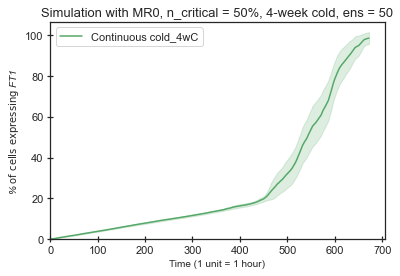

In [11]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0, n_critical = 50%, 4-week cold, ens = 50", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['mean'], 'g', label= 'Continuous cold_4wC')
ax.fill_between(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['lower'], df_MR0_50_4wC_ens50['upper'], color='g', alpha=0.2)

# ax.plot(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['mean'], 'blue', label= 'Alternating cold/warm_4wCW')
# ax.fill_between(df_MR0_50_4wCW['time'], df_MR0_50_4wCW['lower'], df_MR0_50_4wCW['upper'], color='blue', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
# fig.savefig("hfsp_4wC_and_4wCW_MR0_3D.png", dpi = 600)

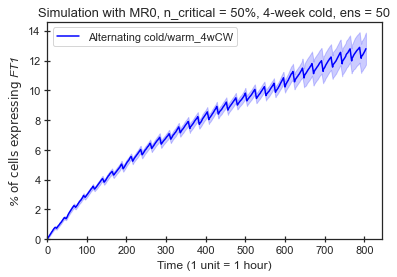

In [12]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulation with MR0, n_critical = 50%, 4-week cold, ens = 50", font = "Arial", fontsize = 13)

# ax.plot(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['mean'], 'g', label= 'Continuous cold_4wC')
# ax.fill_between(df_MR0_50_4wC_ens50['time'], df_MR0_50_4wC_ens50['lower'], df_MR0_50_4wC_ens50['upper'], color='g', alpha=0.2)

ax.plot(df_MR0_50_4wCW_ens50['time'], df_MR0_50_4wCW_ens50['mean'], 'blue', label= 'Alternating cold/warm_4wCW')
ax.fill_between(df_MR0_50_4wCW_ens50['time'], df_MR0_50_4wCW_ens50['lower'], df_MR0_50_4wCW_ens50['upper'], color='blue', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
# fig.savefig("hfsp_4wC_and_4wCW_MR0_3D.png", dpi = 600)

In [1]:
df_MR0_50_4wC_ens50

NameError: name 'df_MR0_50_4wC_ens50' is not defined